In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Load the CHIRPS rainfall data for Guyana
ds = xr.open_dataset('/home/samuel/Desktop/CDR_Guyana_2023-04-28101818am/CDR_Guyana_2023-04-28101818am.nc')


In [7]:
# 1. Compute the monthly rainfall totals and climatologies
monthly_totals = ds['precip'].resample(datetime='1M').sum(dim='datetime')
climatologies = monthly_totals.groupby('datetime.month').mean(dim='datetime')

In [10]:
# 2. Compute the annual totals and average across the country
annual_totals = ds['precip'].resample(datetime='1Y').sum(dim='datetime')
annual_average = annual_totals.mean(dim=['lat', 'lon'])

In [11]:
# 3. Compute the number of dry and wet days (per month and per year)
wet_days = ds['precip'].where(ds['precip'] >= 1).resample(datetime='1D').count(dim='datetime')
dry_days = ds['precip'].where(ds['precip'] < 1).resample(datetime='1D').count(dim='datetime')

In [12]:
wet_days_monthly = wet_days.resample(datetime='1M').sum(dim='datetime')
dry_days_monthly = dry_days.resample(datetime='1M').sum(dim='datetime')


In [13]:
wet_days_annual = wet_days.resample(datetime='1Y').sum(dim='datetime')
dry_days_annual = dry_days.resample(datetime='1Y').sum(dim='datetime')


In [14]:
# 4. Compute extreme rainfall indices
extreme_rainfall_10mm = ds['precip'].where(ds['precip'] >= 10).resample(datetime='1D').count(dim='datetime')
extreme_rainfall_20mm = ds['precip'].where(ds['precip'] >= 20).resample(datetime='1D').count(dim='datetime')

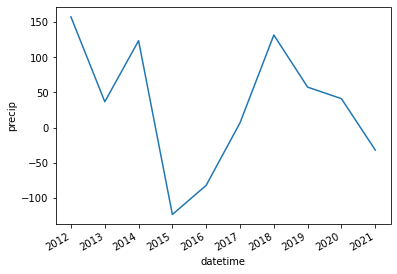

In [63]:
#bplot the annual average precip over time
annual_average.plot()

In [16]:
# Define rainfall thresholds
wet_threshold = 1.0 # mm

# Compute monthly and annual dry/wet days
monthly_wet_days = (ds['precip'] >= wet_threshold).groupby('datetime.month').sum(dim='datetime')
annual_wet_days = (ds['precip'] >= wet_threshold).resample(datetime='1Y').sum(dim='datetime')
monthly_dry_days = (ds['precip'] < wet_threshold).groupby('datetime.month').sum(dim='datetime')
annual_dry_days = (ds['precip'] < wet_threshold).resample(datetime='1Y').sum(dim='datetime')

(array([5.160e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 9.200e+01, 3.195e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

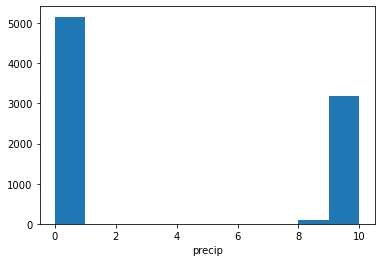

In [58]:
# Plot monthly wet days
monthly_wet_days.plot()

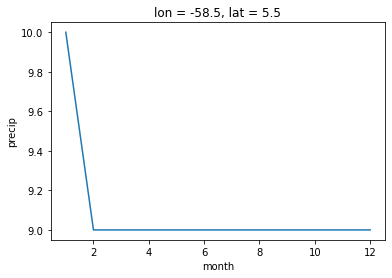

In [60]:
# monthly wet days as a timeseries
monthly_wet_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='month')

(array([3.151e+03, 1.320e+02, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.160e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

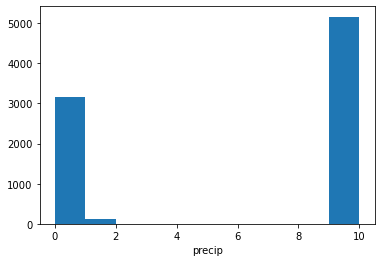

In [61]:
# Plot monthly dry days
monthly_dry_days.plot()

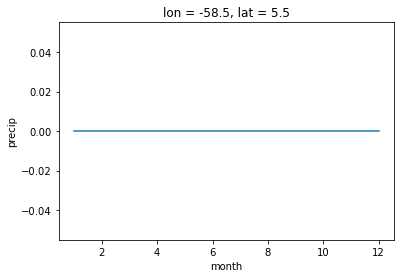

In [62]:
# monthly dry days as a timeseries
monthly_dry_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='month')

(array([4574.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   23.,
        2443.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

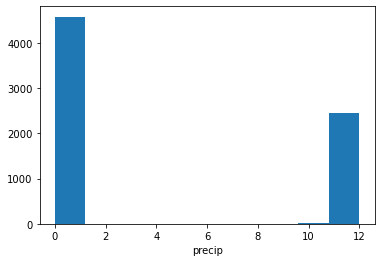

In [17]:
# Plot annual wet days
annual_wet_days.plot()

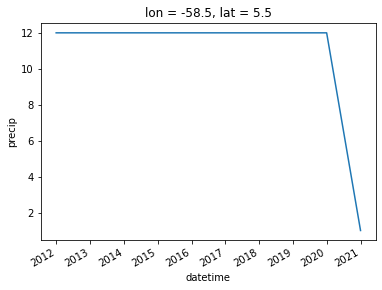

In [42]:
# annual wet days days as a timeseries
annual_wet_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='datetime')

(array([3147.,   23.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3870.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

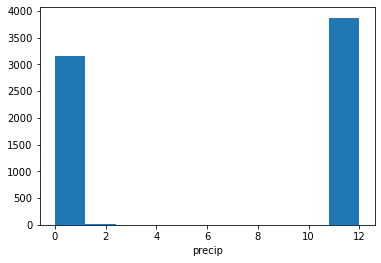

In [19]:
# Plot annual dry days
annual_dry_days.plot()

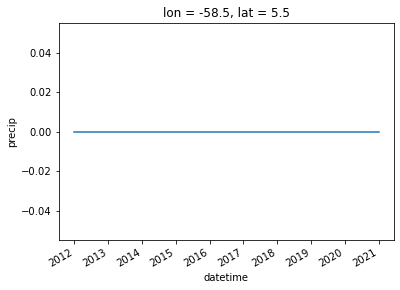

In [44]:
# annual dry days days as a timeseries
annual_dry_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='datetime')

In [20]:
# Define extreme rainfall thresholds
threshold1 = 10.0 # mm
threshold2 = 20.0 # mm

# Compute monthly and annual extreme rainfall days
monthly_extreme1_days = (ds['precip'] >= threshold1).groupby('datetime.month').sum(dim='datetime')
annual_extreme1_days = (ds['precip'] >= threshold1).resample(datetime='1Y').sum(dim='datetime')
monthly_extreme2_days = (ds['precip'] >= threshold2).groupby('datetime.month').sum(dim='datetime')
annual_extreme2_days = (ds['precip'] >= threshold2).resample(datetime='1Y').sum(dim='datetime')

(array([5160.,    0.,    0.,    0.,    0.,    0.,    0.,   16.,  270.,
        3002.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

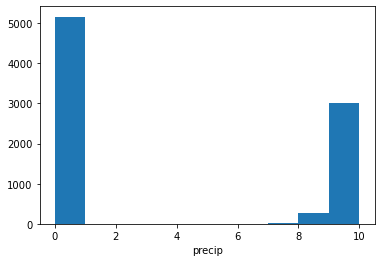

In [48]:
# Plot monthly extreme1 days
monthly_extreme1_days.plot()

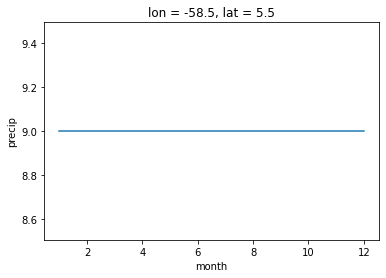

In [37]:
# Select one location and plot monthly extreme1 days as a timeseries
monthly_extreme1_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='month')

(array([5.160e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.900e+01, 2.010e+02, 4.890e+02, 2.578e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

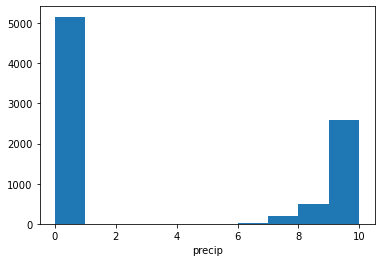

In [49]:
# Plot monthly extreme2 days
monthly_extreme2_days.plot()

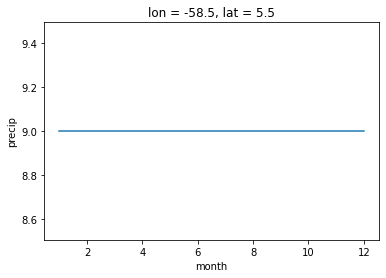

In [47]:
# Select one location and plot monthly extreme2  days as a timeseries
monthly_extreme2_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='month')

(array([4.574e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 5.000e+00, 7.300e+01, 2.386e+03]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

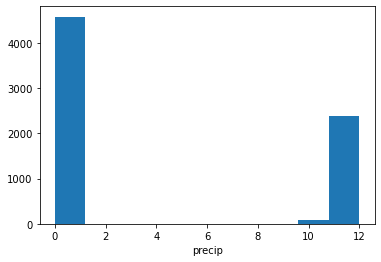

In [21]:
# Plot annual extreme1 days
annual_extreme1_days.plot()

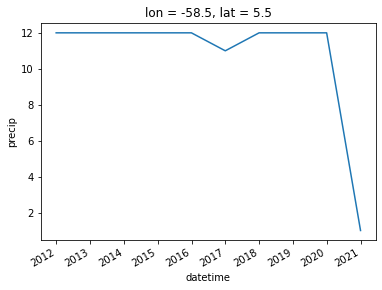

In [65]:
# Select one location and plot annual extreme1  days as a timeseries
annual_extreme1_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='datetime')

(array([4574.,    0.,    0.,    0.,    0.,   26.,    7.,   27.,  181.,
        2225.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

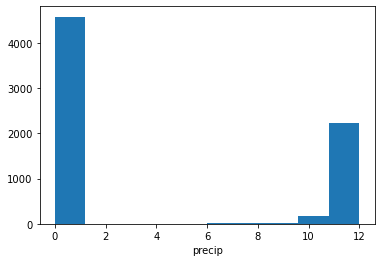

In [22]:
# Plot annual extreme2 days
annual_extreme2_days.plot()

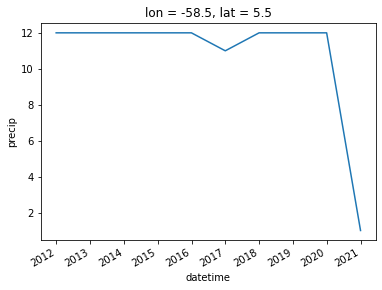

In [57]:
# Select one location and plot annual extreme2  days as a timeseries
annual_extreme2_days.sel(lat=5.5, lon=-58.5, method='nearest').plot.line(x='datetime')